## **VISÃO COMPUTACIONAL - PROVA PI - 30/09/2021**











**NOME:** NICOLE SARVASI ALVES DA COSTA


**PROBLEMA 1 (2.0 PONTOS).** Considere o seguinte trecho de código em OpenCV e PyWavelet. O que faz este código ?

In [ ]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow
import pywt
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
coefs = pywt.dwt2(img,'haar')
LL, (LH, HL, HH) = coefs
R=np.maximum(np.maximum(LH,HL),HH)

(256, 256) LL


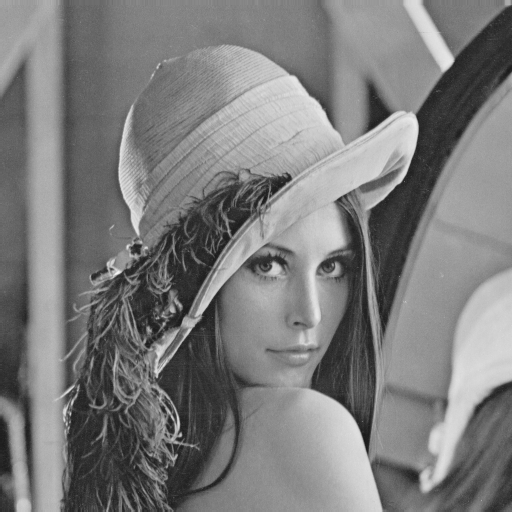

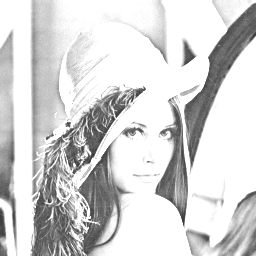

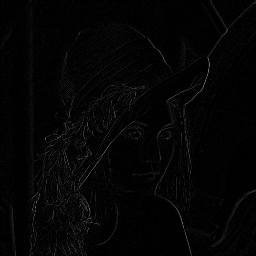

In [2]:
#coloque sua resposta aqui no formato de comentário. Use código, se achar necessário. 

#Este código inicialmente importa a biblioteca cv2 e a numpy
import cv2 as cv
import numpy as np

#Assim como a função cv2_imshow, responsável por "printar" as imagens.
from google.colab.patches import cv2_imshow

#Depois é importado o pywt, o qual é um software que realiza a transformada de Wavelet.
import pywt

#Com o comando cv.imread lemos a imagem e já convertemos o espaço de cor com o comando cv.cvtColor de BGR para níveis de cinza com o cv.COLOR_BGR2GRAY
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)

#Aqui ocorre a implementação da transformada de Wavelet na imagem pela família 'haar'
coefs = pywt.dwt2(img,'haar')
LL, (LH, HL, HH) = coefs
R=np.maximum(np.maximum(LH,HL),HH)

print(LL.shape,"LL")

#print imagem original convertida para níveis de cinza
cv2_imshow(img)

#print Aproximação
cv2_imshow(LL)

cv2_imshow(R)

**PROBLEMA 2 (2.0 PONTOS).** Considere a função abaixo, que recebe quatro parâmetros: uma imagem em níveis de cinza, a coordenada de uma pixel (x,y) e um valor T.

In [3]:
def enigma(img,x,y,T):
  if abs(img[x+1][y]-img[x][y])>=T:
    return 255
  else:
    return 0

Utilize esta função para calcular um contorno da imagem lena.png, lida no código abaixo:

(512, 512, 3)


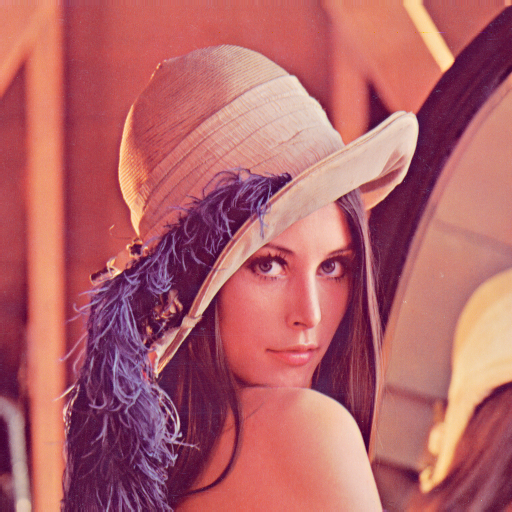

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
cv2_imshow(img)

(512, 512)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


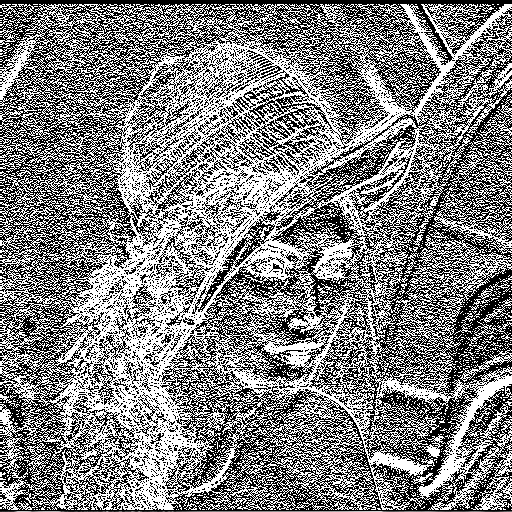

In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
print(img.shape)

rows, cols = img.shape
for l in range(rows-1):
  for c in range(cols):
    img[l,c] = enigma(img,l,c,10)

cv2_imshow(img)

**PROBLEMA 3 (3.0 PONTOS).** A subtração de background (fundo) é uma técnica muito comum para detectar objetos em movimentação em uma cena. Seu esquema de implementação é mostrado abaixo.

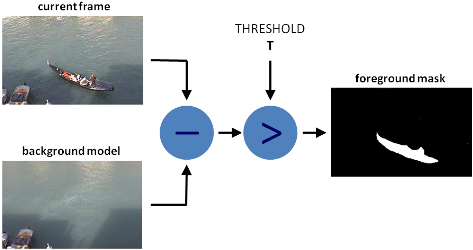

In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('backgroundsubtraction.png')
cv2_imshow(img)

Usando o frame e o background abaixo, implemente a operação de subtração de background em OpenCV.

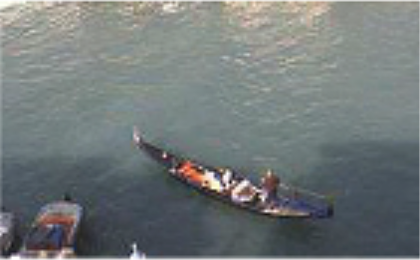

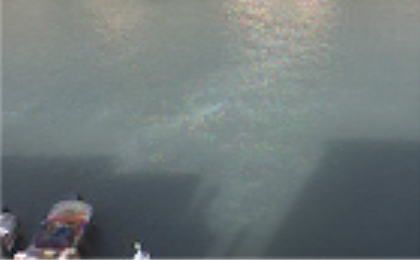

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
frame = cv.imread('frame.png')
cv2_imshow(frame)
back = cv.imread('background.png')
cv2_imshow(back)

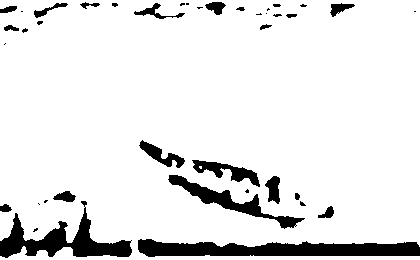

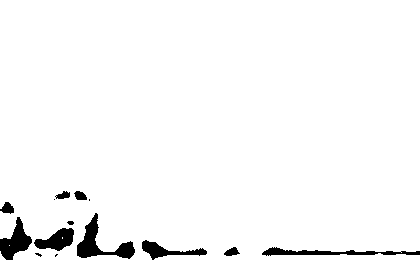

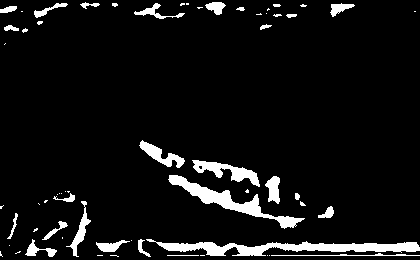

In [95]:
#implemente sua solução aqui

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
frame = cv.imread('frame.png')
back = cv.imread('background.png')

gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
gray_back = cv.cvtColor(back, cv.COLOR_BGR2GRAY)
blurred_frame = cv.GaussianBlur(gray_frame, (9, 9), 0)
blurred_back = cv.GaussianBlur(gray_back, (9, 9), 0)

rows, cols = gray_frame.shape
#T = np.median(gray_frame)

imgt_frame = cv.adaptiveThreshold(blurred_frame,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,37,14)
imgt_back = cv.adaptiveThreshold(blurred_back,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,37,14)


subtract = cv.subtract (imgt_back, imgt_frame)
cv2_imshow(imgt_frame)
cv2_imshow(imgt_back)
cv2_imshow(subtract)

**PROBLEMA 4 (3.0 PONTOS).** Abaixo, temos um código em OpenCV que abre uma imagem BGR com três canais de cor, cada cor representada como um número inteiro. 

O sistema de cores CMYK é um sistema de cores subtrativo formado pelas cores Ciano (C), Magenta (M), Amarelo (Y) e Preto (K) e, estas cores, trabalham no intervalo [0.0,1.0]. Abaixo, temos as fórmulas de conversão de RGB para CMYK:


*   K=1-max(R,G,B)/255
*   C=(1-K-R/255)/(1-K)
*   M=(1-K-G/255)/(1-K)
*   Y=(1-K-B/255)/(1-K)

Escreva um programa em OpenCV que converta a imagem BGR para CMYK. Imprima o shape da imagem convertida e exiba os canais gerados.

(512, 512, 3)


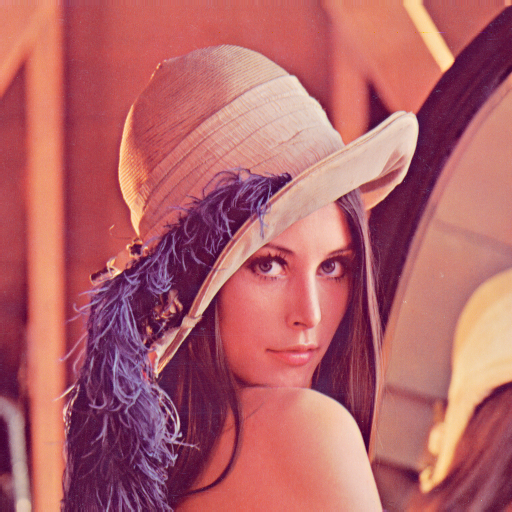

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
cv2_imshow(img)

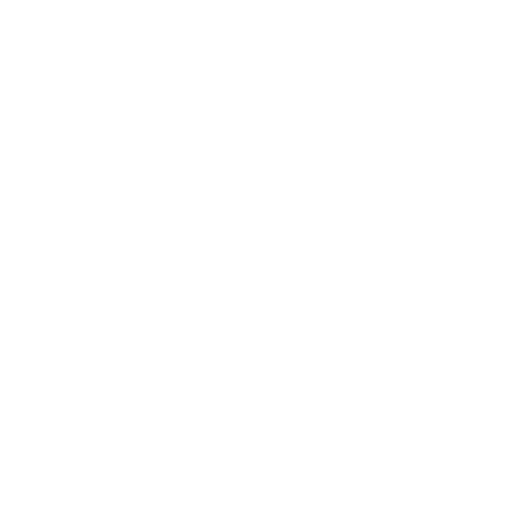

(512, 512, 4)


In [125]:
#implemente sua solução aqui

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
B,G,R=cv.split(img)

rowsB, colsB = B.shape

K = np.zeros((512,512),np.uint8)
C = np.zeros((512,512),np.uint8)
M = np.zeros((512,512),np.uint8)
Y = np.zeros((512,512),np.uint8)

for l in range(rowsB):
  for c in range(colsB):
      K[l,c] = 1 - max(B[l,c],G[l,c],R[l,c])/255
      C[l,c] = (1-K[l,c]-R[l,c]/255)/(1-K[l,c])
      M[l,c] = (1-K[l,c]-G[l,c]/255)/(1-K[l,c])
      Y[l,c] = (1-K[l,c]-B[l,c]/255)/(1-K[l,c])

CMYK = cv.merge([C,M,Y,K])
cv2_imshow(CMYK)
print(CMYK.shape)